# Supervised FuzzyART

TODO

In [35]:
# An IPython magic syntax that tells matplotlib to plot in a new cell instead of a new window
from importlib import reload
import fuzzyart as fa
reload(fa)

%matplotlib inline

In [36]:
data = fa.DataContainer()

art = fa.AudeyART(
    data.dim,
    rho=0.45,
    beta=1.0,
)

In [37]:

# To train, we loop over every sample
for ix in range(data.n_samples):
    # Extract the sample as a vector at sample index `ix`
    data_x = data.data_cc[ix, :]
    data_y = int(data.data["Label"][ix])
    # Train the model on the sample!
    # Because this is unsupervised, we have no other information to give to the model besides the sample itself.
    art.train(data_x, y=data_y)

In [38]:
art.map
# art.W

[1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

In [39]:
# Initialize a simple Python vector for the label estimates (i.e., the category indices)
y_hats = []
# Iterate over all of the samples again
for ix in range(data.n_samples):
    # Extract the single sample as before
    data_x = data.data_cc[ix, :]
    # Classify the sample, this time getting the label that the FuzzyART algorithm prescribed to it
    y_hat = art.classify(data_x)
    # Append to our list of labels
    y_hats.append(y_hat)

In [40]:
y_hats

[1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 0,
 2,
 2,
 2,
 0]

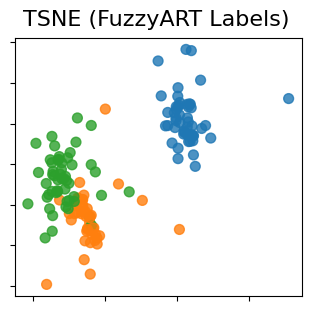

In [41]:
# Generate the plot
S_t_sne = fa.get_tsne(data)
fa.plot_2d(S_t_sne.T, y_hats, "TSNE (FuzzyART Labels)")